In [1]:
import numpy as np
import pandas as pd
import tweepy
import json
from tweepy import OAuthHandler
from textblob import TextBlob
import re
import seaborn as sns

In [2]:
consumer_key = "koiXFIvg3E3tvMR6DLms6dLkS"
consumer_secret = "bWWwroPA33AfAsExc0wTyqNidRcR0PXrhv1ZwlJ7H5iZCQ4xs8"
access_token = "1321839037380849665-6RcjJnMQW6n6kp3o49ZV8K6hiMo33w"
access_token_secret = "yHX2PDdyJf2ya4WetncrQzFec79kOWUMMkIzXHuuMQaUa"

In [3]:
auth = tweepy.OAuthHandler( consumer_key , consumer_secret )
auth.set_access_token( access_token , access_token_secret )
api = tweepy.API(auth)

In [4]:
query = "covid in Indonesia"

In [5]:
Tweets = api.search( query , count=5 , lang='en' , exclude='retweets' , tweet_mode='extended' )
# tweet_mode='extended'
# tweet_mode='compat'

for tweet in Tweets:
    print(tweet._json['user'],"\n")
    print(".....................................\n")

{'id': 251867831, 'id_str': '251867831', 'name': 'EU in Indonesia', 'screen_name': 'uni_eropa', 'location': 'Jakarta', 'description': 'Official Twitter of the EU Delegation to Indonesia | Follow us on Facebook @uni.eropa & Instagram @uni_eropa | Follow Ambassador on Twitter @DubesUniEropa', 'url': 'https://t.co/pfwbczq0la', 'entities': {'url': {'urls': [{'url': 'https://t.co/pfwbczq0la', 'expanded_url': 'http://eeas.europa.eu/indonesia', 'display_url': 'eeas.europa.eu/indonesia', 'indices': [0, 23]}]}, 'description': {'urls': []}}, 'protected': False, 'followers_count': 15361, 'friends_count': 669, 'listed_count': 234, 'created_at': 'Mon Feb 14 00:53:11 +0000 2011', 'favourites_count': 2446, 'utc_offset': None, 'time_zone': None, 'geo_enabled': True, 'verified': True, 'statuses_count': 11688, 'lang': None, 'contributors_enabled': False, 'is_translator': False, 'is_translation_enabled': False, 'profile_background_color': 'C6E2EE', 'profile_background_image_url': 'http://abs.twimg.com/im

In [6]:
mu = {'nama' : 'hilman'}
mu.get('nama')

'hilman'

In [7]:
"""['created_at', 'id', 'id_str', 'full_text', 'truncated', 'display_text_range', 'entities', 'extended_entities', 'metadata', 'source', 'in_reply_to_status_id', 'in_reply_to_status_id_str', 'in_reply_to_user_id', 'in_reply_to_user_id_str', 'in_reply_to_screen_name', 'user', 'geo', 'coordinates', 'place', 'contributors', 'is_quote_status', 'retweet_count', 
'favorite_count', 'favorited', 'retweeted', 'possibly_sensitive', 'lang']"""

"['created_at', 'id', 'id_str', 'full_text', 'truncated', 'display_text_range', 'entities', 'extended_entities', 'metadata', 'source', 'in_reply_to_status_id', 'in_reply_to_status_id_str', 'in_reply_to_user_id', 'in_reply_to_user_id_str', 'in_reply_to_screen_name', 'user', 'geo', 'coordinates', 'place', 'contributors', 'is_quote_status', 'retweet_count', \n'favorite_count', 'favorited', 'retweeted', 'possibly_sensitive', 'lang']"

In [8]:
def stream(data, file_name):
    df = pd.DataFrame(columns = ['Tweets' , 'User' , 'User_statuses_count' , 
                            'user_followers' , 'User_location' , 'User_verified' ,
                            'fav_count' , 'rt_count' , 'tweet_date'] )
    
    i = 0
    for twt in (tweepy.Cursor(api.search, q=data, count=100, lang='en', tweet_mode='extended').items()):
        print(i, end='\r')
        tweet = twt._json

        df.loc[i, 'Tweets'] = tweet['full_text']
        df.loc[i, 'User'] = tweet['user']['name']
        df.loc[i, 'User_statuses_count'] = tweet['user']['statuses_count']
        df.loc[i, 'user_followers'] = tweet['user']['followers_count']
        df.loc[i, 'User_location'] = tweet['user']['location']
        df.loc[i, 'User_verified'] = tweet['user']['verified']
        df.loc[i, 'fav_count'] = tweet['favorite_count']
        df.loc[i, 'rt_count'] = tweet['retweet_count']
        df.loc[i, 'tweet_date'] = tweet['created_at']
        
        i = i+1
        if i == 1000:
            break
        else:
            pass
        
    df.to_excel('{}.xlsx'.format(file_name))
    
    return df

In [9]:
querry = "covid in Indonesia"
df = stream(data=querry, file_name='my_tweets')

In [10]:
df.shape

(1000, 9)

In [11]:
def clean_tweet(tweet):
    return ' '.join(re.sub('(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)', ' ', tweet).split())

In [12]:
def analyze_sentiment(tweet):
    analysis = TextBlob(tweet)
    if analysis.sentiment.polarity > 0:
        return 'Positive'
    elif analysis.sentiment.polarity == 0:
        return 'Neutral'
    else:
        return 'Negative'

In [13]:
df['clean_tweet'] = df['Tweets'].apply(clean_tweet)

In [14]:
df.head()

,Tweets,User,User_statuses_count,user_followers,User_location,User_verified,fav_count,rt_count,tweet_date,clean_tweet
0,"RT @Expat_Indo: Former VP, and current head of...",TrisnaNugraha,64723,271,Baros City,False,0,15,Sun Nov 01 10:42:26 +0000 2020,RT Indo Former VP and current head of Indonesi...
1,RT @uni_eropa: Join Session 24 to hear speaker...,Yulia Maroe,617,130,Ciputat,False,0,2,Sun Nov 01 10:42:21 +0000 2020,RT eropa Join Session 24 to hear speakers from...
2,RT @uni_eropa: Join Session 24 to hear speaker...,My IT Media,74412,420,"Tokyo, Japan",False,0,2,Sun Nov 01 09:23:03 +0000 2020,RT eropa Join Session 24 to hear speakers from...
3,"RT @Expat_Indo: Former VP, and current head of...",sjafira difa,4845,268,,False,0,15,Sun Nov 01 09:09:48 +0000 2020,RT Indo Former VP and current head of Indonesi...
4,RT @HumConBerlin: 'Tuberculosis is still highe...,oji' poenxa,18538,597,lereng merapi barat(Srumbung),False,0,3,Sun Nov 01 09:08:56 +0000 2020,RT Tuberculosis is still higher than COVID in ...


In [15]:
df['Sentiment'] = df['clean_tweet'].apply(analyze_sentiment)
df.head()

,Tweets,User,User_statuses_count,user_followers,User_location,User_verified,fav_count,rt_count,tweet_date,clean_tweet,Sentiment
0,"RT @Expat_Indo: Former VP, and current head of...",TrisnaNugraha,64723,271,Baros City,False,0,15,Sun Nov 01 10:42:26 +0000 2020,RT Indo Former VP and current head of Indonesi...,Neutral
1,RT @uni_eropa: Join Session 24 to hear speaker...,Yulia Maroe,617,130,Ciputat,False,0,2,Sun Nov 01 10:42:21 +0000 2020,RT eropa Join Session 24 to hear speakers from...,Negative
2,RT @uni_eropa: Join Session 24 to hear speaker...,My IT Media,74412,420,"Tokyo, Japan",False,0,2,Sun Nov 01 09:23:03 +0000 2020,RT eropa Join Session 24 to hear speakers from...,Negative
3,"RT @Expat_Indo: Former VP, and current head of...",sjafira difa,4845,268,,False,0,15,Sun Nov 01 09:09:48 +0000 2020,RT Indo Former VP and current head of Indonesi...,Neutral
4,RT @HumConBerlin: 'Tuberculosis is still highe...,oji' poenxa,18538,597,lereng merapi barat(Srumbung),False,0,3,Sun Nov 01 09:08:56 +0000 2020,RT Tuberculosis is still higher than COVID in ...,Positive


<AxesSubplot:xlabel='Sentiment', ylabel='count'>

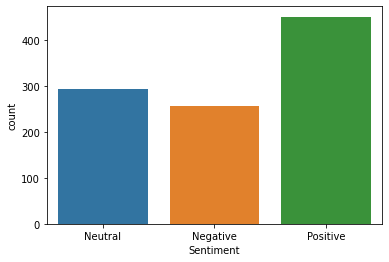

In [16]:
sns.countplot(df.Sentiment)

In [17]:
n = 1
print("Original tweet:\n",df['Tweets'][n])
print()
print("Clean tweet:\n",df['clean_tweet'][n])
print()
print("Sentiment of the tweet:\n",df['Sentiment'][n])

Original tweet:
 RT @uni_eropa: Join Session 24 to hear speakers from Europe and Indonesia talk about green recovery in post COVID-19. Register at https://t…

Clean tweet:
 RT eropa Join Session 24 to hear speakers from Europe and Indonesia talk about green recovery in post COVID 19 Register at

Sentiment of the tweet:
 Negative


In [18]:
n = 20
print("Original tweet:\n",df['Tweets'][n])
print()
print("Clean tweet:\n",df['clean_tweet'][n])
print()
print("Sentiment of the tweet:\n",df['Sentiment'][n])

Original tweet:
 @NaveenG49456696 @XHNews Firstly, about Covid-19. it was firstly identified in a seafood market in Wuhan. much western media says it is because the Chinese eats bats. but actually Chinese never has the habit to eat such thing, the vedios spreading on line is actually in some Island of Indonesia.

Clean tweet:
 Firstly about Covid 19 it was firstly identified in a seafood market in Wuhan much western media says it is because the Chinese eats bats but actually Chinese never has the habit to eat such thing the vedios spreading on line is actually in some Island of Indonesia

Sentiment of the tweet:
 Positive


In [19]:
n = 4

print("Original tweet:\n",df['Tweets'][n])
print()
print("Clean tweet:\n",df['clean_tweet'][n])
print()
print("Sentiment of the tweet:\n",df['Sentiment'][n])

Original tweet:
 RT @HumConBerlin: 'Tuberculosis is still higher than COVID [in Indonesia], but right now everyone is thinking only of COVID ' @amahusein @M…

Clean tweet:
 RT Tuberculosis is still higher than COVID in Indonesia but right now everyone is thinking only of COVID

Sentiment of the tweet:
 Positive


In [20]:
df[df.Sentiment == 'Positive'].shape[0]

450

In [21]:
df[df.Sentiment == 'Neutral'].shape[0]

293

In [22]:
df[df.Sentiment == 'Negative'].shape[0]

257